In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_csv(r'C:\Users\anoop\OneDrive\Desktop\Downloads\c7307096abf311ec\NLP_Data\train.csv')
train_data.head()

,ID,Place,location,date,status,job_title,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6,overall
0,1,startup_1,NaN,"Dec 11, 2018",Current Employee,Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,NaN,4.0,5.0,5.0,4.0,5.0,0,5.0
1,2,startup_1,"Mountain View, CA","Jun 21, 2013",Former Employee,Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,2.0,3.0,3.0,5.0,3.0,2094,5.0
2,3,startup_1,"New York, NY","May 10, 2014",Current Employee,Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,4.0,5.0,5.0,4.0,949,5.0
3,4,startup_1,"Mountain View, CA","Feb 8, 2015",Current Employee,Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,2.0,5.0,5.0,4.0,5.0,498,4.0
4,10,startup_1,NaN,"Dec 9, 2018",Current Employee,Anonymous Employee,Execellent for engineers,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,NaN,5.0,5.0,5.0,5.0,5.0,0,4.0


In [3]:
test_data=pd.read_csv(r'C:\Users\anoop\OneDrive\Desktop\Downloads\c7307096abf311ec\NLP_Data\test.csv')
test_data.head()

,ID,Place,location,date,status,job_title,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6
0,5,startup_1,"Los Angeles, CA","Jul 19, 2018",Former Employee,Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5,5,5,5,5,49
1,6,startup_1,"Mountain View, CA","Dec 9, 2018",Former Employee,SDE2,NICE working in GOOGLE as an INTERN,"People are not that busy, so they are nice to ...",Food is not good as I expected. People said it...,NaN,4,4,4,5,4,1
2,7,startup_1,"New York, NY","Dec 11, 2018",Current Employee,Software Engineer,Software engineer,Great working environment. Good work life balance,Usual big company problems. Hierarchy.,NaN,5,4,4,5,4,0
3,8,startup_1,NaN,"Dec 11, 2018",Former Employee,Anonymous Employee,great place to work and progress,"work culture, benefits, growth, people,",No cons that i can think of,NaN,5,5,5,5,5,0
4,9,startup_1,"New York, NY","Dec 10, 2018",Current Employee,Anonymous Employee,Google Surpasses Realistic Expectations,Great products. Vision you can feel good about...,Younger employees complaining about the compan...,NaN,5,5,5,5,5,0


In [4]:
train_data.shape

(30336, 17)

In [5]:
train_data.columns

Index(['ID', 'Place', 'location', 'date', 'status', 'job_title', 'summary',
       'positives', 'negatives', 'advice_to_mgmt', 'score_1', 'score_2',
       'score_3', 'score_4', 'score_5', 'score_6', 'overall'],
      dtype='object')

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30336 entries, 0 to 30335
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30336 non-null  int64  
 1   Place           30336 non-null  object 
 2   location        19082 non-null  object 
 3   date            30336 non-null  object 
 4   status          30336 non-null  object 
 5   job_title       30336 non-null  object 
 6   summary         30284 non-null  object 
 7   positives       30336 non-null  object 
 8   negatives       30336 non-null  object 
 9   advice_to_mgmt  17059 non-null  object 
 10  score_1         27150 non-null  float64
 11  score_2         24286 non-null  float64
 12  score_3         27167 non-null  float64
 13  score_4         27145 non-null  float64
 14  score_5         26851 non-null  float64
 15  score_6         30336 non-null  int64  
 16  overall         30336 non-null  float64
dtypes: float64(6), int64(2), object

In [7]:
train_data.describe()

,ID,score_1,score_2,score_3,score_4,score_5,score_6,overall
count,30336.000000,27150.000000,24286.000000,27167.000000,27145.000000,26851.000000,30336.000000,30336.000000
mean,33998.602716,3.370460,3.784773,3.630047,3.943986,3.322446,1.388482,3.588179
std,19506.284643,1.301983,1.300164,1.225714,1.043053,1.314696,21.390609,0.996981
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,17198.750000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,3.000000
50%,34121.500000,3.500000,4.000000,4.000000,4.000000,3.000000,0.000000,4.000000
75%,50907.500000,4.000000,5.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,67528.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2094.000000,5.000000


In [8]:
train_data.isna().sum()

ID                    0
Place                 0
location          11254
date                  0
status                0
job_title             0
summary              52
positives             0
negatives             0
advice_to_mgmt    13277
score_1            3186
score_2            6050
score_3            3169
score_4            3191
score_5            3485
score_6               0
overall               0
dtype: int64

In [9]:
train_data.dtypes

ID                  int64
Place              object
location           object
date               object
status             object
job_title          object
summary            object
positives          object
negatives          object
advice_to_mgmt     object
score_1           float64
score_2           float64
score_3           float64
score_4           float64
score_5           float64
score_6             int64
overall           float64
dtype: object

In [10]:
train_data['score_1']=train_data['score_1'].fillna(train_data['score_1'].median())

In [11]:
train_data['score_2'] =train_data['score_2'].fillna(train_data['score_2'].median())
train_data['score_3'] =train_data['score_3'].fillna(train_data['score_3'].median())
train_data['score_4'] =train_data['score_4'].fillna(train_data['score_4'].median())
train_data['score_5'] =train_data['score_5'].fillna(train_data['score_5'].median())
train_data['score_6'] =train_data['score_6'].fillna(train_data['score_6'].median())
train_data['overall'] =train_data['overall'].fillna(train_data['overall'].median())

In [12]:
train_data['location'] =train_data['location'].fillna(train_data['location'].mode())
train_data['summary'] =train_data['summary'].fillna(train_data['summary'].mode())
train_data['advice_to_mgmt'] =train_data['advice_to_mgmt'].fillna(train_data['advice_to_mgmt'].mode())

In [13]:
train_data.isna().sum()

ID                    0
Place                 0
location          11253
date                  0
status                0
job_title             0
summary              52
positives             0
negatives             0
advice_to_mgmt    13276
score_1               0
score_2               0
score_3               0
score_4               0
score_5               0
score_6               0
overall               0
dtype: int64

In [14]:
train_data=train_data.drop(['location','advice_to_mgmt','summary'],axis=1)
train_data.columns

Index(['ID', 'Place', 'date', 'status', 'job_title', 'positives', 'negatives',
       'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6',
       'overall'],
      dtype='object')

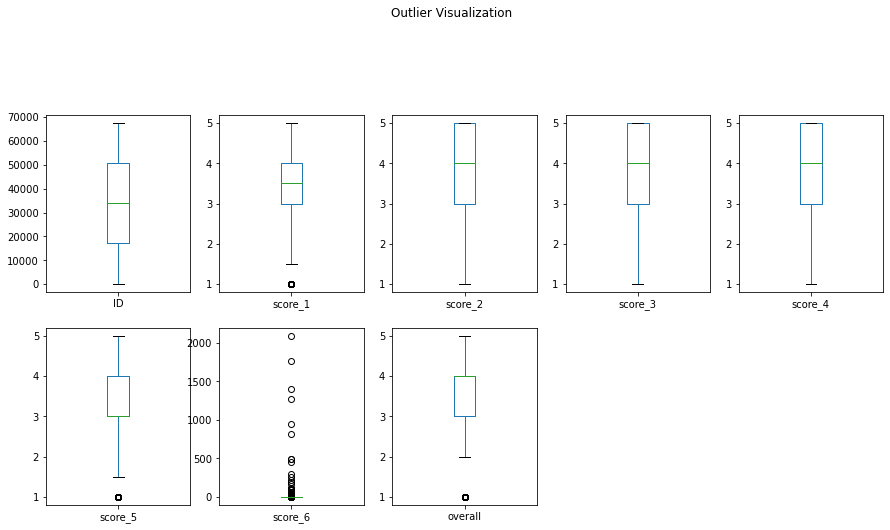

In [15]:
train_data.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,15),title='Outlier Visualization')
plt.show()

In [16]:
Q1=np.percentile(train_data['score_1'],25,interpolation='midpoint')
Q2=np.percentile(train_data['score_1'],50,interpolation='midpoint')   
Q3=np.percentile(train_data['score_1'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3) 

#finding IQR
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)          
print(up_lim)

3.0
3.5
4.0
1.5
5.5


In [17]:
#removing outlier using for loop
outlier=[]
for x in train_data['score_1']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
        
len(outlier)

3220

Text(0.5, 1.0, 'Box plot of score_1')

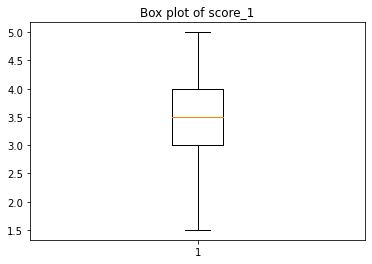

In [18]:
#Removing the outliers
ind1=train_data['score_1']<low_lim
train_data.loc[ind1].index
train_data.drop(train_data.loc[ind1].index,inplace=True)
plt.boxplot(train_data['score_1'])
plt.title('Box plot of score_1')

In [19]:
Q1=np.percentile(train_data['score_6'],25,interpolation='midpoint')
Q2=np.percentile(train_data['score_6'],50,interpolation='midpoint')   
Q3=np.percentile(train_data['score_6'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3) 

#finding IQR
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)          
print(up_lim)

0.0
0.0
1.0
-1.5
2.5


In [20]:
#removing outlier using for loop
outlier=[]
for x in train_data['score_6']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
        
len(outlier)

2357

Text(0.5, 1.0, 'Box plot of score_6')

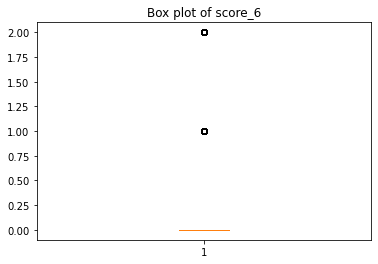

In [21]:
#Removing the outliers
ind2=train_data['score_6']<low_lim
train_data.loc[ind2].index
train_data.drop(train_data.loc[ind2].index,inplace=True)
ind3=train_data['score_6']>up_lim
train_data.loc[ind3].index
train_data.drop(train_data.loc[ind3].index,inplace=True)
plt.boxplot(train_data['score_6'])
plt.title('Box plot of score_6')

In [22]:
Q1=np.percentile(train_data['score_5'],25,interpolation='midpoint')
Q2=np.percentile(train_data['score_5'],50,interpolation='midpoint')   
Q3=np.percentile(train_data['score_5'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3) 

#finding IQR
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)          
print(up_lim)

3.0
3.0
4.0
1.5
5.5


In [23]:
#removing outlier using for loop
outlier=[]
for x in train_data['score_5']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
        
len(outlier)

1321

Text(0.5, 1.0, 'Box plot of score_5')

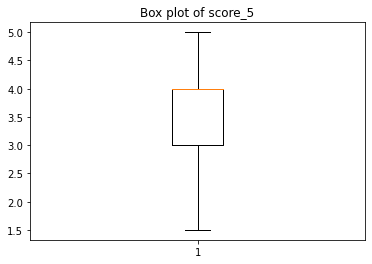

In [24]:
#Removing the outliers
ind4=train_data['score_5']<low_lim
train_data.loc[ind4].index
train_data.drop(train_data.loc[ind4].index,inplace=True)
plt.boxplot(train_data['score_5'])
plt.title('Box plot of score_5')

In [25]:
train_data.columns

Index(['ID', 'Place', 'date', 'status', 'job_title', 'positives', 'negatives',
       'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6',
       'overall'],
      dtype='object')

In [26]:
# Splitting dataset into x and y
y = train_data['overall']
X = train_data.drop(['overall','Place', 'date', 'status', 'job_title', 'positives', 'negatives'],axis=1)

In [27]:
X

,ID,score_1,score_2,score_3,score_4,score_5,score_6
0,1,4.0,5.0,5.0,4.0,5.0,0
4,10,5.0,5.0,5.0,5.0,5.0,0
5,16,3.5,4.0,4.0,4.0,3.0,0
6,17,4.0,5.0,5.0,5.0,4.0,2
7,18,3.5,4.0,2.0,4.0,3.0,1
...,...,...,...,...,...,...,...
30330,67521,3.0,4.0,2.5,3.0,4.5,1
30332,67524,3.5,4.0,3.5,4.0,4.0,0
30333,67525,3.0,4.0,4.0,4.0,2.0,0
30334,67527,3.0,4.0,4.0,4.5,3.5,0


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, precision_score
from sklearn.metrics import plot_confusion_matrix

C:\Users\anoop\Downloads\INDU\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anoop\Downloads\INDU\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anoop\Downloads\INDU\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        35
         2.0       0.00      0.00      0.00       442
         3.0       0.00      0.00      0.00      1770
         4.0       0.38      1.00      0.55      2228
         5.0       0.00      0.00      0.00      1385

    accuracy                           0.38      5860
   macro avg       0.08      0.20      0.11      5860
weighted avg       0.14      0.38      0.21      5860



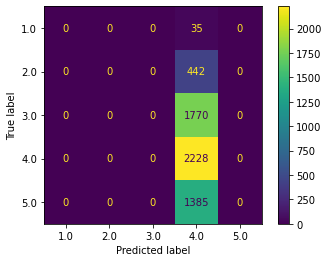

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)
lr = linear_model.LogisticRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)
predictions
plot_confusion_matrix(lr, X_test, y_test)
print(classification_report(y_test, predictions))

In [34]:
print(predictions)

[4. 4. 4. ... 4. 4. 4.]


In [30]:
test_data.columns

Index(['ID', 'Place', 'location', 'date', 'status', 'job_title', 'summary',
       'positives', 'negatives', 'advice_to_mgmt', 'score_1', 'score_2',
       'score_3', 'score_4', 'score_5', 'score_6'],
      dtype='object')

In [81]:
test_data=test_data.drop(['Place', 'location', 'date', 'status', 'job_title', 'summary',
       'positives', 'negatives', 'advice_to_mgmt'],axis=1)

In [82]:
test_data.head()

,ID,score_1,score_2,score_3,score_4,score_5,score_6
0,5,5,5,5,5,5,49
1,6,4,4,4,5,4,1
2,7,5,4,4,5,4,0
3,8,5,5,5,5,5,0
4,9,5,5,5,5,5,0


In [83]:
test_data.isna().sum()

ID         0
score_1    0
score_2    0
score_3    0
score_4    0
score_5    0
score_6    0
dtype: int64

In [88]:
test_data.columns

Index(['ID', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6'], dtype='object')

In [90]:
make_predict=test_data[['ID', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6']]


In [91]:
model.predict(make_predict).item()

ValueError: can only convert an array of size 1 to a Python scalar

,ID,score_1,score_2,score_3,score_4,score_5,score_6
0,1,4.0,5.0,5.0,4.0,5.0,0
4,10,5.0,5.0,5.0,5.0,5.0,0
5,16,3.5,4.0,4.0,4.0,3.0,0
6,17,4.0,5.0,5.0,5.0,4.0,2
7,18,3.5,4.0,2.0,4.0,3.0,1
...,...,...,...,...,...,...,...
30330,67521,3.0,4.0,2.5,3.0,4.5,1
30332,67524,3.5,4.0,3.5,4.0,4.0,0
30333,67525,3.0,4.0,4.0,4.0,2.0,0
30334,67527,3.0,4.0,4.0,4.5,3.5,0


In [32]:
X.to_csv('out.csv')

In [ ]:
predict=